In [1]:
from pathlib import Path
from claravid import ClaravidDataset
from matplotlib import pyplot as plt

In [2]:
ROOT = Path(r"/path/to/claravid")
dataset = ClaravidDataset(
    root=ROOT,
    missions=['highway_1', ], # see ClaravidMissions
    altitude = ['low', ], # see ClaravidAltitude
    direction= ['v', 'h'], # see ClaravidGridDirection
    fields = None,
)

In [3]:
data_sample = dataset[60]

In [4]:
data_sample.keys()

dict_keys(['rgb', 'depth', 'seg_color', 'pan_seg', 'dynamic_mask', 'extrinsics', 'intrinsics', 'frame_idx'])

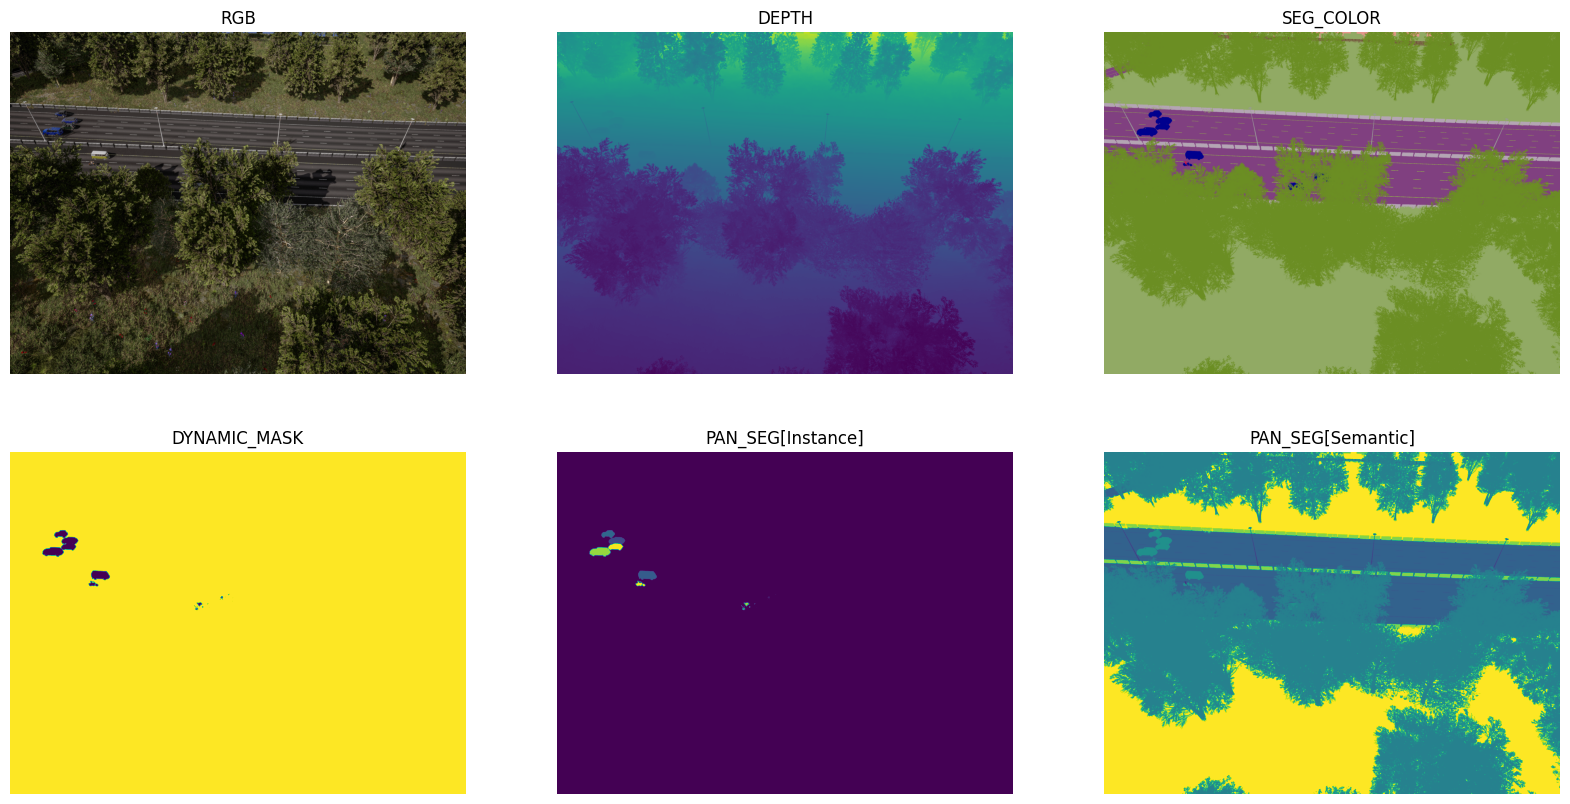

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.ravel()

for i, f in enumerate(['rgb', 'depth', 'seg_color', 'dynamic_mask']):
    ax[i].imshow(data_sample[f])
    ax[i].set_title(f.upper())
    ax[i].axis('off')

ax[i+1].imshow(data_sample['pan_seg'][..., 0])
ax[i+1].axis('off')
ax[i+1].set_title("PAN_SEG[Instance]")
ax[i+2].imshow(data_sample['pan_seg'][..., 1])
ax[i+2].axis('off')
ax[i+2].set_title("PAN_SEG[Semantic]");


In [6]:
extrinsics = dataset.read_all_extrinsics()
extrinsics.shape

(1512, 4, 4)

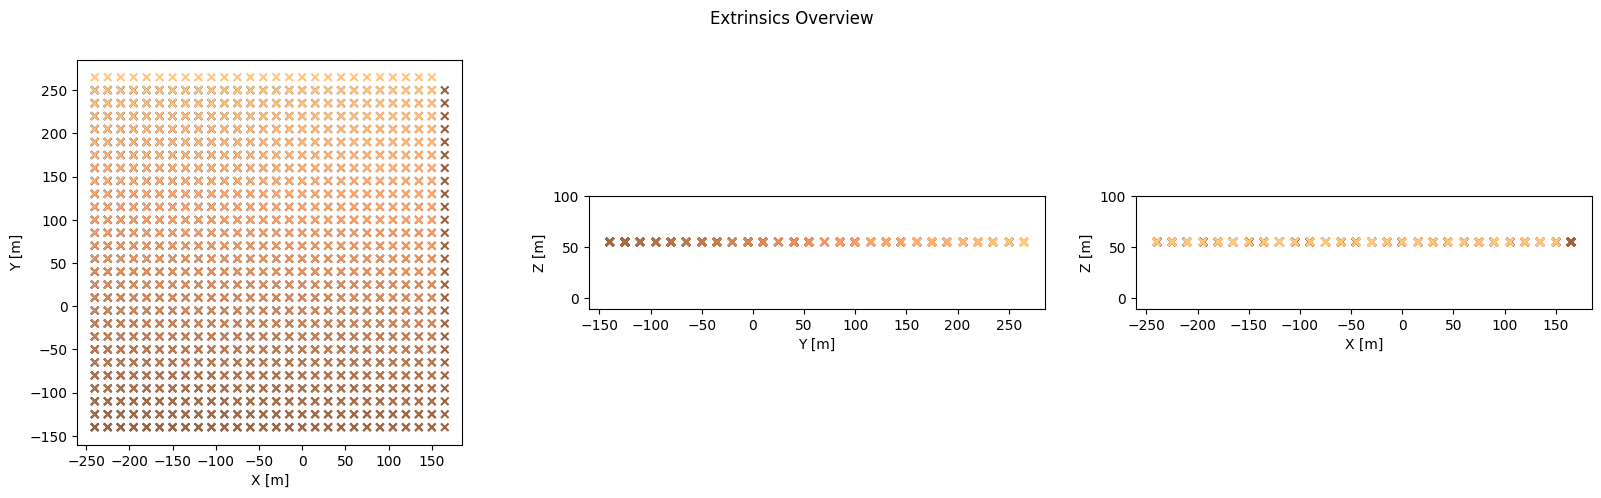

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
pos = extrinsics[:, :3, 3]
ax[0].scatter(pos[:, 0], pos[:, 1], s=30, marker='x', c=range(len(pos)), cmap='copper')
ax[0].set_xlabel('X [m]')
ax[0].set_ylabel('Y [m]')

ax[1].scatter(pos[:, 1], pos[:, 2], s=30, marker='x', c=range(len(pos)), cmap='copper')
ax[1].set_xlabel('Y [m]')
ax[1].set_ylabel('Z [m]')
ax[1].set_ylim([-10, 100])

ax[2].scatter(pos[:, 0], pos[:, 2], s=30, marker='x', c=range(len(pos)), cmap='copper')
ax[2].set_xlabel('X [m]')
ax[2].set_ylabel('Z [m]')
ax[2].set_ylim([-10, 100])

for ax in ax:
    ax.set_aspect('equal', adjustable='box')
fig.suptitle("Extrinsics Overview");